## Online Retail Analysis

In this project, we will be analyzing a dataset containing transactional data from an online retail company based in the United Kingdom. The objective of this project is not only to uncover meaningful insights that could guide business decisions but also to demonstrate the application of various data analysis techniques that are essential for a data analyst role.

The dataset 'online_retail_II.xlsx' comprises transactions occurring between 01/12/2009 and 09/12/2011. It includes information such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.

Throughout this analysis, we will approach it from a perspective of a data analyst tasked with generating actionable insights for the business. We aim to answer questions such as:

1. What is the monthly revenue of the company?
2. What products are contributing the most to the revenue?
3. Which countries have the highest revenue and number of customers?
4. What is the monthly growth rate for the company?
5. What is the customer retention rate?

**Tools and Libraries**

We will be using Python and its libraries including Pandas for data manipulation and analysis, and Matplotlib and Seaborn for data visualization.

Let's dive in!


In [1]:
# Import the required libraries
from google.colab import drive
import pandas as pd

# Connect Colab to your Google Drive
drive.mount('/content/drive')

# Define the path to the Excel file in your Google Drive
file_path = "/content/drive/MyDrive/data_science/projects/online_retail_analysis/data/raw/online_retail_II.xlsx"

# Load the data from the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

Mounted at /content/drive


In [2]:
# View the first 5 rows of the dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# Check the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
# Generate descriptive statistics for the numerical columns
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


### Preliminary Data Assessment

After initial data loading and exploration, we have identified some essential characteristics of our dataset:

1. **Missing Values:** The dataset has some missing values specifically in the 'Description' and 'Customer ID' columns. There are 2,928 entries without a product description and 107,927 entries without a customer ID.

2. **Data Types:** Each column's data type seems to be appropriate for the data it holds. For instance, 'InvoiceDate' is in datetime format, 'Price' and 'Quantity' are numerical (float64 and int64 respectively), while 'Invoice', 'StockCode', 'Description', and 'Country' are of object data type, which is expected since they contain string or mixed type values.

3. **Data Quality:** It's noticeable that some quantities are negative which may represent returned items or could be errors in the data. These need to be addressed during the data cleaning process.

The next steps will involve cleaning the data to handle missing values and potential data errors, followed by a deeper exploration of the dataset to identify patterns and insights.


In [5]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the result
print(missing_values)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [6]:
# Remove rows with missing values
df_clean = df.dropna()

# Check thhe number of missing values in each column to confirm
print(df_clean.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


## Data Preparation: Creation of New Columns

To facilitate our analysis and align the data more closely with our objectives, we will create a few new columns in our dataset:

1. **Revenue**: This is a product of `Quantity` and `Price`. This new column will allow us to directly analyze the financial aspect of the transactions. It will help answer questions related to the company's revenue.

2. **Month-Year**: The `InvoiceDate` provides detailed timestamp information, which is a bit too granular for our analysis. By creating a new column `Month-Year`, we will be able to aggregate and analyze our data at a month level. This will be useful for trend analysis over time.

3. **Returned Item**: The `Quantity` column in our dataset has negative values, which likely represent returned items. By creating a `Returned Item` column, we can easily separate transactions that were purchases from those that were returns. This can offer insights into the volume and value of returned items.

The creation of these new columns is a crucial part of our data preparation process, enabling a more streamlined and targeted analysis.


In [7]:
# Create Revenue column
df['Revenue'] = df['Quantity'] * df['Price']

# Create Month-Year column
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# Create Returned Item column
df['ReturnedItem'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,MonthYear,ReturnedItem
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12,0


## Data Exploration

Now that we've cleaned our data and created new features, let's dig a bit deeper. The next step is data exploration - an essential part of the data analysis process. It involves getting a better understanding of our data and identifying patterns, trends, and insights that can be used to inform our analysis.

We'll start this stage by calculating and visualizing the monthly revenue, which is an essential metric for any retail business. By doing so, we can understand the sales trend and seasonality, which are crucial for business planning.

To do this, we'll group our data by the 'MonthYear' column we've created, then calculate the total revenue for each month. We'll then visualize this information using a line plot, which is a common tool for displaying time-series data.

In the next steps, we'll be diving deeper into product sales, customer distribution by country, monthly growth rate, and customer retention. Each of these exploratory analyses will contribute to a comprehensive understanding of the online retail business performance.

Let's start exploring!


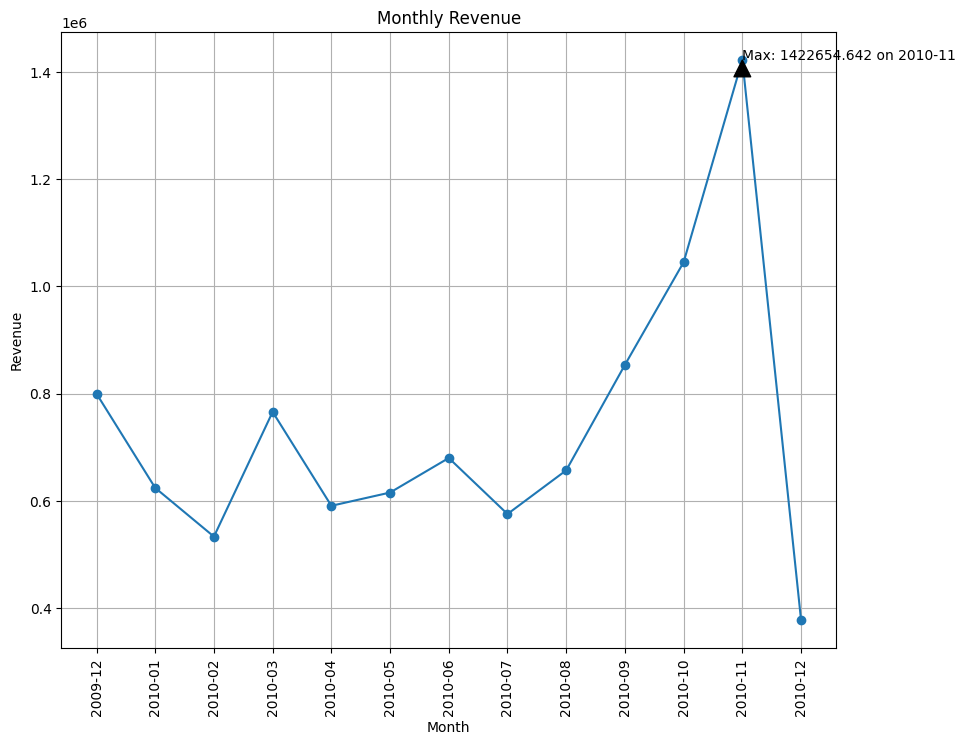

In [9]:
# Calculate monthly revenue
monthly_revenue_df = df.groupby('MonthYear')['Revenue'].sum().reset_index()

# Import matplotlib
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10,8))
plt.plot(monthly_revenue_df['MonthYear'].astype(str), monthly_revenue_df['Revenue'], marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)

max_revenue = monthly_revenue_df['Revenue'].max()
max_date = monthly_revenue_df['MonthYear'][monthly_revenue_df['Revenue'].idxmax()]
plt.annotate(f'Max: {max_revenue} on {str(max_date)}', xy=(str(max_date),max_revenue), xytext=(str(max_date),max_revenue+500),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

### Monthly Revenue Over Time

We've noticed an interesting pattern: there's a significant drop in revenue in the final month of our data. This could potentially distort our analysis. Often in real-world data, the latest period can appear to have lower numbers simply because the data for that period is incomplete. It's a common issue that data analysts have to watch out for.

To address this, we'll remove the final month from our dataset if the last date of the transactions is not the end of the month. This should help us get a more accurate view of the monthly revenue trend. Let's adjust our data and create the plot again.


Latest date in data: 2010-12-09 20:01:00
Removing last month from data


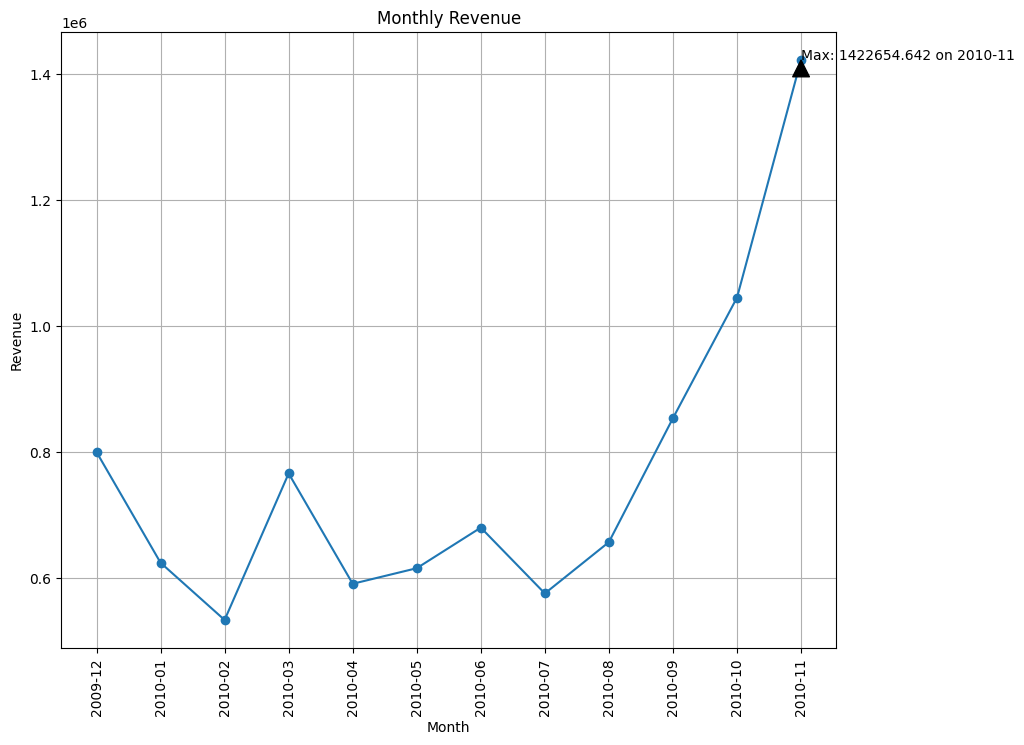

In [10]:
# Check the latest date in the data
latest_date = df['InvoiceDate'].max()
print("Latest date in data:", latest_date)

# If the latest date is not the end of the month, remove the last month from the data
if latest_date.day < 28:  # Just a rough check, it's better to use a library that knows about months
    print("Removing last month from data")
    monthly_revenue_df = monthly_revenue_df[monthly_revenue_df['MonthYear'] < latest_date.to_period('M')]

# Create the plot as before, but now excluding the last month if it's incomplete
plt.figure(figsize=(10,8))
plt.plot(monthly_revenue_df['MonthYear'].astype(str), monthly_revenue_df['Revenue'], marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)

# Displaying the maximum value in the dataset
max_revenue = monthly_revenue_df['Revenue'].max()
max_date = monthly_revenue_df['MonthYear'][monthly_revenue_df['Revenue'].idxmax()]
plt.annotate(f'Max: {max_revenue} on {str(max_date)}', xy=(str(max_date),max_revenue), xytext=(str(max_date),max_revenue+500),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()



**Next, we will calculate the Monthly Revenue Growth Rate.**

In order to understand the company's growth, we need to calculate the growth rate from one month to the next. This will give us an indication of how fast the company is growing. A positive growth rate indicates that the company is growing, while a negative growth rate indicates that the company's revenue is decreasing.

Text(0, 0.5, 'Growth Rate')

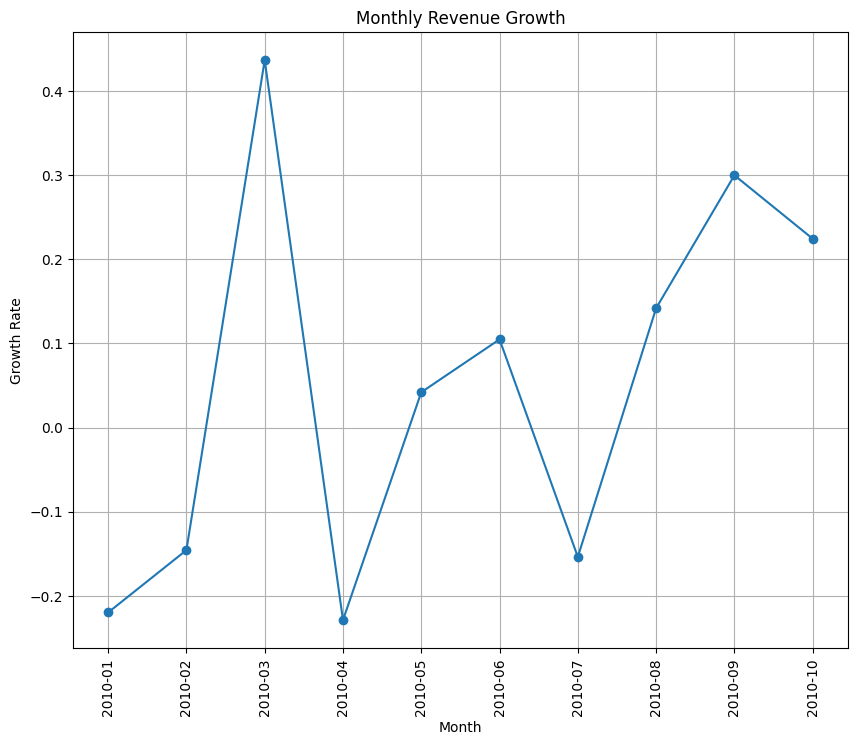

In [11]:
# Calculate revenue growth rate
monthly_revenue_df['MonthlyGrowth'] = monthly_revenue_df['Revenue'].pct_change()

# Remove the last month
monthly_revenue_df = monthly_revenue_df[:-1]

# Plot
plt.figure(figsize=(10,8))
plt.plot(monthly_revenue_df['MonthYear'].astype(str), monthly_revenue_df['MonthlyGrowth'], marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.title('Monthly Revenue Growth')
plt.xlabel('Month')
plt.ylabel('Growth Rate')

In [12]:
print(monthly_revenue_df)

   MonthYear      Revenue  MonthlyGrowth
0    2009-12   799847.110            NaN
1    2010-01   624032.892      -0.219810
2    2010-02   533091.426      -0.145732
3    2010-03   765848.761       0.436618
4    2010-04   590580.432      -0.228855
5    2010-05   615322.830       0.041895
6    2010-06   679786.610       0.104764
7    2010-07   575236.360      -0.153799
8    2010-08   656776.340       0.141750
9    2010-09   853650.431       0.299758
10   2010-10  1045168.350       0.224352


Here are a few insights we can gather from the data:

1. **Revenue Fluctuations**: We can see that revenue has fluctuated from month to month. It isn't always increasing, suggesting that sales might be influenced by external factors, such as seasonal trends, promotions, or varying demand for different products.

2. **Seasonal Impact**: Similar to the customer count, the revenue also sees a significant increase in March 2010 (about 43.66% growth), and then another rise in June and August 2010. This could again point to a seasonal impact on the company's revenue.

3. **Growth Rate Variation**: The growth rate isn't consistent, suggesting that the company's sales performance is somewhat unpredictable. The negative growth rates in some months indicate periods of decrease in revenue.

4. **Potential Issues**: The significant drop in revenue growth in January and February 2010 (about -21.98% and -14.57% respectively) might be worth investigating further. This could be due to a number of factors, such as a seasonal downturn after the holiday period, issues with supply chain, or changes in the market.

Remember that these insights provide a starting point for further exploration and analysis. They would ideally be supplemented with more granular data, market research, and input from different departments within the company (like marketing, supply chain, sales etc.).


## Most Popular Products

Understanding which products are the most popular (i.e., have the highest sales volume) can offer valuable insights for the business. These products could be the key drivers of revenue and can be the focus of marketing efforts.

In this section, we will identify the top selling products. We will aggregate the total quantity sold for each product (represented by the `StockCode`). The products will then be sorted in descending order to present the items with the highest sales volume at the top.


In [13]:
# Group by StockCode and sort by Quantity
popular_products_df = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).reset_index()

# Show the top 5 products
popular_products_df.head()

,StockCode,Description,Quantity
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,57428
1,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
2,17003,BROCADE RING PURSE,47647
3,21212,PACK OF 72 RETRO SPOT CAKE CASES,46106
4,84879,ASSORTED COLOUR BIRD ORNAMENT,44925


## Analyzing Revenue and Customer Count by Country

To understand where the majority of our revenue comes from, it's important to break down the revenue by country. We will also look at the number of unique customers per country, as this can give us an indication of the size of each market.

In [14]:
# Create a dataframe that groups by country and sums the revenue
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()

# Create a dataframe that counts the unique number of customers by country
customers_by_country = df.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False).reset_index()

# Rename the columns
customers_by_country.rename(columns={'Customer ID': 'NumberOfCustomers'}, inplace=True)

# Print the top 5 countries by revenue
print(revenue_by_country.head())

# Print the top 5 countries by number of customers
print(customers_by_country.head())


          Country      Revenue
0  United Kingdom  8194777.533
1            EIRE   352242.730
2     Netherlands   263863.410
3         Germany   196290.351
4          France   130769.900
          Country  NumberOfCustomers
0  United Kingdom               4035
1         Germany                 68
2          France                 47
3           Spain                 25
4     Netherlands                 23


### Key Insights

1. **Domestic Dominance:** The majority of the revenue is generated domestically in the United Kingdom. This is not surprising given that the retailer is UK-based. This shows that domestic sales remain a key area of focus for the company.

2. **Customer Count:** The UK has significantly more customers compared to any other country, reinforcing its dominance in terms of sales revenue.

3. **Purchase Behavior:** Ireland and the Netherlands, despite having fewer customers compared to Germany and France, generate the second and third highest revenues respectively. This suggests that on average, customers from these countries are making larger purchases.

4. **Potential Markets:** The higher customer counts in Germany and France, despite lower total revenue, suggest potential for market expansion in these countries. These markets may benefit from strategies to increase the average transaction size.

5. **Wholesaler Effect:** The customer numbers and revenues may reflect the behavior of wholesalers rather than end consumers. For example, the smaller customer numbers but larger revenue in Netherlands could be due to a few large wholesalers. This is an important factor to consider in further analysis and decision-making.


## Sales Trend Analysis

Next, we will perform sales trend analysis to understand the company's sales performance and customer shopping behavior over time. We will examine if there are particular months where sales significantly increase. These could be due to successful promotions or seasonal shopping trends. Understanding these trends can provide valuable insights for strategic planning and decision making.


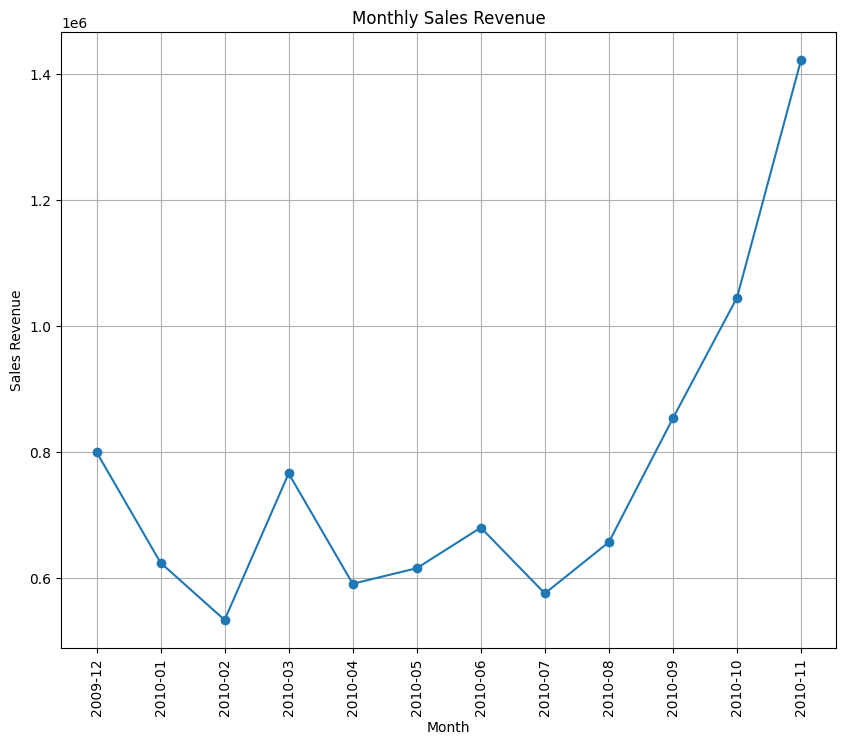

In [15]:
# Create YearMonth column with Year and Month extracted from InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and calculate the sum of the revenue
monthly_sales = df.groupby('YearMonth')['Revenue'].sum().reset_index()

# Removing last month's data
monthly_sales = monthly_sales[:-1]

# Plot
plt.figure(figsize=(10,8))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Revenue'], marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.show()

## Active Customers Analysis
In this section, we will analyze the number of active customers each month. This can help us understand the company's customer retention and acquisition efforts. Knowing how many customers are active can inform our marketing strategies and customer relationship management.


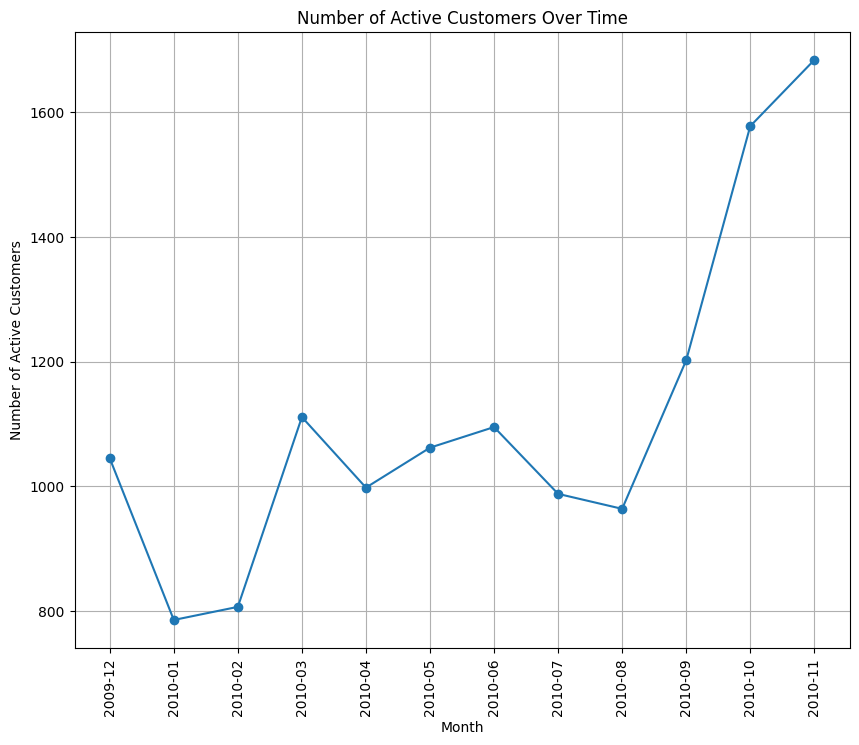

In [16]:
# Create a dataframe with Customer ID and Invoice Month
df_active = df.groupby(['Customer ID', 'MonthYear']).count().reset_index()

# Create a dataframe with active customers for each month
active_customers = df_active.groupby('MonthYear')['Customer ID'].nunique()

# Remove last month's data
active_customers = active_customers[:-1]

# Plot
plt.figure(figsize=(10,8))
plt.plot(active_customers.index.astype(str), active_customers, marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.title('Number of Active Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Active Customers')
plt.show()

In [17]:
print(active_customers)


MonthYear
2009-12    1045
2010-01     786
2010-02     807
2010-03    1111
2010-04     998
2010-05    1062
2010-06    1095
2010-07     988
2010-08     964
2010-09    1202
2010-10    1577
2010-11    1683
Freq: M, Name: Customer ID, dtype: int64


Here are a few insights we can gather from the data:

1. **Seasonal Trends**: The number of active customers seems to fluctuate over time, with noticeable increases towards the end of the year. This could indicate seasonal trends in shopping behavior. In particular, November 2010 saw the highest number of active customers (1683), which might be due to the start of the holiday shopping season.

2. **Growth**: The number of active customers appears to be generally increasing over time. This is a good sign as it indicates that the online store is attracting more customers as time goes on.

3. **Retention**: While the numbers fluctuate month to month, the fact that there's a steady presence of active customers indicates that a portion of the customer base is returning to make purchases.

Remember, these insights are based on trends and patterns and must be further validated using other metrics and factors. They serve as a starting point for developing business strategies, optimizing operations, and making informed decisions.


# Repeat Customers Revenue Trend Analysis

In this section, we will evaluate the contribution of repeat customers to our total revenue. The purpose is to examine if there are certain patterns that can be used to predict future revenues and make strategic decisions. For example, if repeat customers make a significant portion of total revenue and they tend to buy more during a certain period of time, sales and marketing strategies can be developed to target this customer segment during those periods.


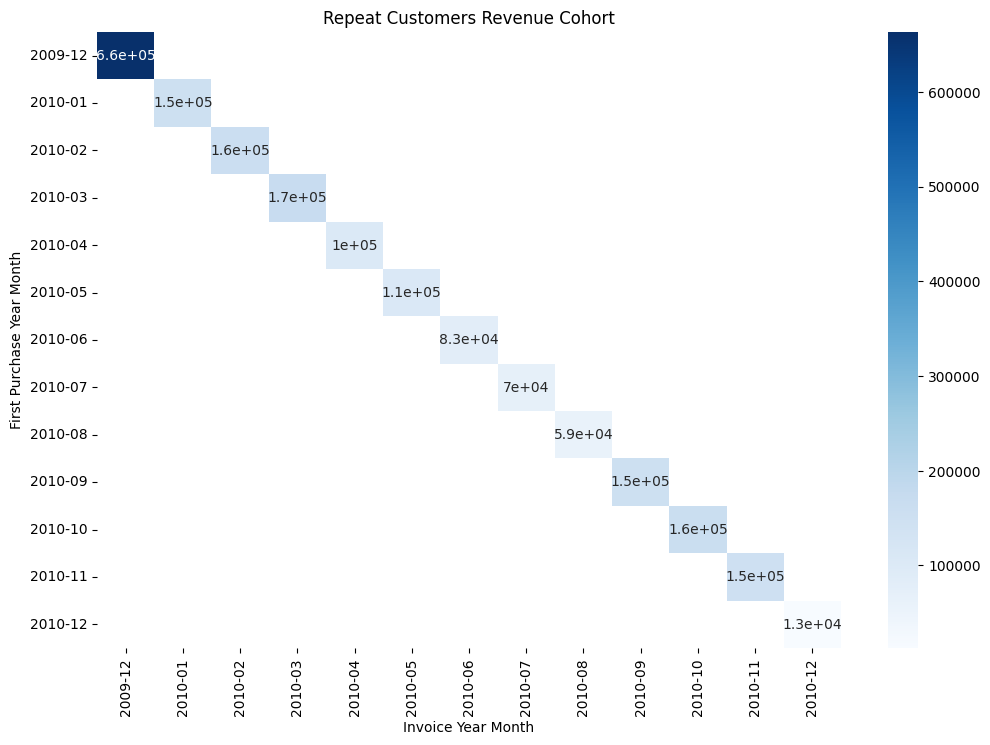

In [18]:
# Import seaborn
import seaborn as sns

# Create a dataframe containing CustomerID and first purchase date
df['FirstPurchaseYearMonth'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')

# Extract year-month from the InvoiceDate
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by CustomerID and select the customers with invoice date min = first purchase date min
df_first_purchase = df[df['InvoiceYearMonth'] == df['FirstPurchaseYearMonth']]

# Calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
cohort_revenue = df_first_purchase.groupby(['FirstPurchaseYearMonth','InvoiceYearMonth'])['Revenue'].sum().reset_index()

# Pivot the cohort_revenue dataframe
cohort_revenue = cohort_revenue.pivot(index='FirstPurchaseYearMonth', columns='InvoiceYearMonth', values='Revenue')

# Create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data = cohort_revenue, annot=True, cmap="Blues")
plt.title('Repeat Customers Revenue Cohort')
plt.xlabel('Invoice Year Month')
plt.ylabel('First Purchase Year Month')
plt.show()


In [19]:
print(df.columns)
print(cohort_revenue)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue', 'MonthYear',
       'ReturnedItem', 'YearMonth', 'FirstPurchaseYearMonth',
       'InvoiceYearMonth'],
      dtype='object')
InvoiceYearMonth          2009-12     2010-01     2010-02     2010-03  \
FirstPurchaseYearMonth                                                  
2009-12                 663272.05         NaN         NaN         NaN   
2010-01                       NaN  150849.971         NaN         NaN   
2010-02                       NaN         NaN  157902.233         NaN   
2010-03                       NaN         NaN         NaN  168494.661   
2010-04                       NaN         NaN         NaN         NaN   
2010-05                       NaN         NaN         NaN         NaN   
2010-06                       NaN         NaN         NaN         NaN   
2010-07                       NaN         NaN         NaN         NaN   
2010-08            

From the Repeat Customers Revenue Cohort analysis, we can infer the following:

1. **First-Time Purchases**: It's noticeable that the majority of customers make purchases in their first month (the month they're acquired). This is shown by the revenue figures present in the diagonal from the top left to bottom right of the heatmap.

2. **Customer Retention**: A potential area of concern is the lack of repeat purchases in the months following the first purchase. This is indicated by the absence of revenue figures (NaN values) for cohorts in the months following their acquisition. This suggests that customer retention might be an issue that needs to be addressed.

3. **Seasonal Influence**: The cohorts in the months of September, October, and November have comparatively higher first-month revenues. This might indicate a seasonal trend where customers tend to make more purchases.

It's crucial to note that while these insights can guide business strategies and decisions, they are based on trends and patterns and must be further validated using other metrics and factors. It's also important to continue monitoring these cohorts over time to identify any changes in customer behavior.


Next, we are going to perform a Purchase Frequency Analysis. This analysis aims to understand how often customers return to make additional purchases, also known as 'Purchase Frequency'.

To do this, we will calculate the Recency, Frequency, and Monetary Value (RFM) for each customer.

- **Recency**: The number of days between the customer's latest order date and the most recent date in our dataset.
- **Frequency**: The total number of purchases made by the customer.
- **Monetary Value**: The total revenue generated by the customer.

After calculating these metrics, we will visualize their distributions using histograms.

Understanding these patterns is crucial as it helps us design personalized marketing strategies to target different customer segments. It also offers insights into customers' shopping behavior, thereby enabling us to optimize our sales and marketing efforts.


In [20]:
import datetime as dt
import pandas as pd

# Assuming you have a dataframe 'df' with columns 'Quantity' and 'Price'
# First, let's create the 'Revenue' column
df['Revenue'] = df['Quantity'] * df['Price']

# Convert the InvoiceDate column to a datetime object, if it isn't already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Then we can perform the RFM analysis
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)  # Latest date in the data set
df_RFM = df.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'count',  # Frequency
    'Revenue': 'sum'  # Monetary Value
})

# Rename the columns
df_RFM.rename(columns = {'InvoiceDate': 'Recency',
                         'Invoice': 'Frequency',
                         'Revenue': 'MonetaryValue'}, inplace=True)

# Check the first few rows to make sure everything worked correctly
print(df_RFM.head())


             Recency  Frequency  MonetaryValue
Customer ID                                   
12346.0           67         46         -64.68
12347.0            3         71        1323.32
12348.0           74         20         222.16
12349.0           43        107        2646.99
12351.0           11         21         300.93


Looking at the RFM (Recency, Frequency, MonetaryValue) data for a subset of customers, we can make a few observations:

1. **Customer 12346** has a high frequency of 46 purchases but shows a negative monetary value (-64.68). This could be due to returns or refunds exceeding the value of actual purchases. This customer has not made a purchase for 67 days, which could suggest they are no longer an active customer.

2. **Customer 12347** has made 71 purchases, the most recent being just 3 days ago, and has contributed a monetary value of 1323.32. This customer appears to be highly engaged and valuable.

3. **Customer 12348** has not made a purchase for 74 days and has made 20 purchases in total, contributing a monetary value of 222.16. This customer may be at risk of churn given their longer period of inactivity.

4. **Customer 12349** has made 107 purchases (the highest frequency among this subset), with the most recent purchase being 43 days ago, and has contributed a significant monetary value of 2646.99. Despite the length of time since their last purchase, they have been a highly active and high-value customer in the past.

5. **Customer 12351** has made a recent purchase 11 days ago and made 21 purchases in total, contributing a monetary value of 300.93. This customer is relatively new and active.

These insights can help in segmenting customers and tailoring marketing and retention strategies to each segment. The RFM values give a good initial understanding of the purchasing behavior of customers.


In [21]:
# Calculate Average Purchase Frequency
purchase_frequency=sum(df_RFM['Frequency'])/df_RFM.shape[0]

# Calculate Repeat Rate and Churn Rate
repeat_rate=df_RFM[df_RFM.Frequency > 1].shape[0]/df_RFM.shape[0]
churn_rate=1-repeat_rate

# Print the results
print(f"Purchase Frequency: {purchase_frequency}")
print(f"Repeat Rate: {repeat_rate}")
print(f"Churn Rate: {churn_rate}")


Purchase Frequency: 95.2621492128679
Repeat Rate: 0.9694273328770249
Churn Rate: 0.030572667122975128


The analysis of the overall purchase behavior across all customers shows the following:

1. **Purchase Frequency**: The average number of purchases made by customers is around 95.26. This suggests a high level of engagement among customers, with the average customer making nearly 95 purchases over the time period considered.

2. **Repeat Rate**: The repeat rate is approximately 96.94%. This is a measure of the proportion of customers who have made more than one purchase. A repeat rate of close to 97% indicates a high level of customer loyalty and repeat purchasing behavior.

3. **Churn Rate**: The churn rate is approximately 3.06%. This represents the proportion of customers who have made a purchase but did not make another subsequent purchase. A low churn rate such as this is a positive indicator of customer retention. However, it should be noted that even a small churn rate can represent a significant number of customers in a large customer base, so strategies should still be implemented to try and reduce this figure where possible.

These metrics provide a summary of the overall customer behavior and loyalty, and can be used to track changes over time and the impact of any interventions or strategies implemented.


# RFM Scoring

The next step in our analysis is to assign a score to each customer based on their behavior in terms of Recency, Frequency, and Monetary (RFM) Value. We want to be able to easily differentiate our customers and better understand their habits. This is where the concept of RFM Scoring comes in.

RFM Scoring is a technique used for analyzing customer value. It's straightforward: assign a score for Recency, Frequency, and Monetary values individually, from 1 (worst) to 4 (best). Then, we combine these three scores together to create a single RFM_Score. This will give us a score ranging from 111 (worst) to 444 (best).

By doing this, we can create customer segments that allow us to identify the best customers (those who buy often and spend a lot), almost lost customers (haven't purchased for some time but bought frequently and spent a lot), lost cheap customers (haven't purchased for some time and when they did, didn't buy much), and so on.

Ultimately, RFM Scoring allows us to customize our marketing to each type of customer, and provide more relevant messages for each one.

In the next step, we will perform RFM Scoring on our data.

In [22]:
# Create a spend quartile with 4 groups - a range between 1 and 5
spend_quartile = pd.qcut(df_RFM['MonetaryValue'], q=4, labels=range(1,5))
recency_quartile = pd.qcut(df_RFM['Recency'], q=4, labels=list(range(4, 0, -1)))

# Assign the quartile values to the Spend_Quartile and Recency_Quartile columns in our dataframe
df_RFM['Spend_Quartile'] = spend_quartile
df_RFM['Recency_Quartile'] = recency_quartile

# Add RFM_Score
df_RFM['RFM_Score'] = df_RFM['Recency_Quartile'].astype(str) + df_RFM['Spend_Quartile'].astype(str)

df_RFM.head()


,Recency,Frequency,MonetaryValue,Spend_Quartile,Recency_Quartile,RFM_Score
Customer ID,,,,,,
12346.0,67,46,-64.68,1,2,21
12347.0,3,71,1323.32,3,4,43
12348.0,74,20,222.16,1,2,21
12349.0,43,107,2646.99,4,3,34
12351.0,11,21,300.93,2,4,42


Analyzing the RFM scoring results can provide valuable insights about the customer base. Here's what the first five entries tell us:

1. **Customer 12346.0** has an RFM score of 21, which indicates they have low Recency (2) and low Monetary value (1). This suggests that the customer has not made a purchase in quite some time and when they did, they didn't spend much. They could be classified as a "lost cheap customer".

2. **Customer 12347.0** has an RFM score of 43, indicating high Frequency (4) and high Recency (3). This customer purchases frequently and has made a purchase quite recently. They could be categorized as a "best customer".

3. **Customer 12348.0**, like customer 12346.0, has an RFM score of 21, indicating low Recency (2) and low Monetary value (1). This customer could also be classified as a "lost cheap customer".

4. **Customer 12349.0** has an RFM score of 34, which suggests high Monetary value (4) but lower Recency (3). This customer has spent a lot but has not made a purchase recently. They could be classified as an "almost lost" customer.

5. **Customer 12351.0** has an RFM score of 42, indicating high Recency (4) and slightly lower Monetary value (2). This customer has made a purchase quite recently, but when they do, they don't tend to spend much. They could be classified as a "new customer".

This RFM score-based segmentation gives us a better understanding of the customer's habits, which can be extremely useful for customizing our marketing strategies. The next step would be to classify the entire customer base using these scores and design targeted marketing campaigns accordingly.


In [23]:
import numpy as np

# Define rfm_level function
def rfm_level(df):
    if bool(int(df['RFM_Score']) >= 10):
        return 'High Value Customer'
    elif bool((int(df['RFM_Score']) < 10) & (int(df['RFM_Score']) >= 6)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

# Create a new variable RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
df_RFM.head()


,Recency,Frequency,MonetaryValue,Spend_Quartile,Recency_Quartile,RFM_Score,RFM_Level
Customer ID,,,,,,,
12346.0,67,46,-64.68,1,2,21,High Value Customer
12347.0,3,71,1323.32,3,4,43,High Value Customer
12348.0,74,20,222.16,1,2,21,High Value Customer
12349.0,43,107,2646.99,4,3,34,High Value Customer
12351.0,11,21,300.93,2,4,42,High Value Customer


## RFM Level Insights

1. The RFM scores among the top five customers shown range from 21 to 43. This range indicates that these customers are highly valuable, considering the scoring system where higher scores depict higher customer value.

2. All customers in this dataset are classified as 'High Value Customer'. This classification suggests that they are recent buyers, frequent buyers, and they spend a lot. In other words, they are loyal customers who contribute significantly to the business's revenue.

3. It's important to note that the RFM scoring system is flexible and should be adapted based on the business context. The current scoring approach where higher RFM scores indicate higher customer value is acceptable and seems to provide a good differentiation of customer value in this context.

4. The main goal of RFM Analysis is to segment customers based on buying behavior. Depending on the needs of your business or analysis, you can adjust the boundaries in the RFM segmentation function to capture different behavioral traits of your customers.


## Next Steps

1. **Analyze RFM segments**: Calculate the average values for Recency, Frequency, and MonetaryValue for each RFM_Level segment. This will help us understand the characteristics of each segment and what differentiates them.

2. **Inform Marketing Strategies**: The insights derived from the RFM analysis can be used to craft more effective and targeted marketing strategies.

3. **Identify Improvement Areas**: For segments that need improvement, such as low value customers, we can devise strategies aimed at improving their frequency or monetary value.

4. **Evaluate Segment Size**: Understanding the distribution of customers in each segment can help us prioritize our marketing and customer engagement efforts.


In [24]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_level_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)


                    Recency Frequency MonetaryValue      
                       mean      mean          mean count
RFM_Level                                                
High Value Customer    91.4      95.3        1904.7  4383


From these results, we can gather the following insights:

1. **High Value Customers** have an average recency of 91.4 days. This means that on average, the customers in this segment made a purchase 91.4 days ago.

2. The frequency for High Value Customers is approximately 95.3, which means that these customers have on average made 95.3 transactions.

3. The average Monetary Value for these customers is 1904.7. This means that these customers have on average spent 1904.7.

4. There are 4383 customers that have been classified as High Value Customers.

The high Monetary Value and Frequency values, coupled with the relatively recent purchases (low Recency value) suggest that these are valuable customers for the business. They are shopping frequently and spending a high amount of money, and they have also made purchases recently.


# Potential Marketing Strategies for Each RFM Segment:

## High Value Customers:
These customers are your most valuable assets. They have recently made purchases, do so often, and they spend more than other customers. It is crucial to make them feel valued and appreciated. Potential strategies include:

- **Exclusive offers or early access to new products:** Reward these customers for their loyalty with exclusive deals and early access to new offerings.
- **Loyalty programs with exclusive rewards:** These can help maintain customer engagement and encourage further spending.
- **Requesting reviews or feedbacks:** These customers are likely to provide valuable insights that can help improve your offerings.
- **Personalized communication with recommendations based on their past purchases:** This can enhance their shopping experience and encourage repeat purchases.

## Mid Value Customers:
These customers show potential to be included in your "High Value Customers" group. With the right strategy, they could become some of your most loyal customers. Possible strategies include:

- **Special offers to encourage higher spend or more frequent purchases:** Consider providing incentives to these customers to increase their engagement and spend.
- **Email marketing with personalized product suggestions:** Utilize data from their past purchases to recommend products that are likely to interest them.
- **Win-back campaigns:** If their Recency score is high, consider using win-back campaigns to re-engage them.

## Low Value Customers:
These customers are the least engaged and spend the least. They may have only purchased once or a few times. While it might be more challenging to convert these customers into high-value ones, they shouldn't be ignored. Potential strategies include:

- **Re-engagement campaigns with great deals on popular products:** Offering discounts on popular items can incentivize these customers to revisit and make purchases.
- **Surveys to understand why they are not purchasing:** Understanding their needs and preferences can help you tailor your offerings and communication to better meet their needs.
- **Recommendations for low-cost but high-value products:** This can attract these customers back and potentially increase their purchase frequency.

The exact strategies would depend on the type of business and the products or services it offers, but this should provide a good starting point.


In [25]:
# Product-wise revenue
product_revenue = df.groupby(['Description'])['Revenue'].sum().sort_values(ascending=False)
print(product_revenue.head(10))  # top 10 products by revenue


Description
REGENCY CAKESTAND 3 TIER               163051.46
WHITE HANGING HEART T-LIGHT HOLDER     157865.43
DOTCOM POSTAGE                         116401.99
ASSORTED COLOUR BIRD ORNAMENT           72454.12
PAPER CHAIN KIT 50'S CHRISTMAS          57870.20
JUMBO BAG RED RETROSPOT                 56444.61
PARTY BUNTING                           49645.52
ROTATING SILVER ANGELS T-LIGHT HLDR     47672.49
POSTAGE                                 46092.36
JUMBO BAG STRAWBERRY                    36699.61
Name: Revenue, dtype: float64


From the data, we can observe that the top 10 products contributing the most to the company's revenue are:

1. REGENCY CAKESTAND 3 TIER: £163,051.46
2. WHITE HANGING HEART T-LIGHT HOLDER: £157,865.43
3. DOTCOM POSTAGE: £116,401.99
4. ASSORTED COLOUR BIRD ORNAMENT: £72,454.12
5. PAPER CHAIN KIT 50'S CHRISTMAS: £57,870.20
6. JUMBO BAG RED RETROSPOT: £56,444.61
7. PARTY BUNTING: £49,645.52
8. ROTATING SILVER ANGELS T-LIGHT HLDR: £47,672.49
9. POSTAGE: £46,092.36
10. JUMBO BAG STRAWBERRY: £36,699.61

These products might be the most popular or have a higher price point compared to other products, resulting in higher revenue. It would be beneficial for the company to ensure these products are always in stock due to their contribution to revenue. Moreover, marketing campaigns or promotional activities can focus on these high revenue-generating products.

Please note the third item, 'DOTCOM POSTAGE', and the ninth item, 'POSTAGE', aren't physical products, but rather reflect shipping and handling costs. This suggests a significant portion of revenue comes from these costs. The company could consider strategies to reduce postage costs to improve overall profit margins.


In [26]:
# Country-wise analysis
country_revenue = df.groupby(['Country'])['Revenue'].sum().sort_values(ascending=False)
print(country_revenue)

country_customers = df['Country'].value_counts()
print(country_customers)


Country
United Kingdom          8194777.533
EIRE                     352242.730
Netherlands              263863.410
Germany                  196290.351
France                   130769.900
Sweden                    51213.510
Denmark                   46972.950
Switzerland               43343.410
Spain                     37084.900
Australia                 30051.800
Portugal                  23769.780
Belgium                   22663.530
Channel Islands           21367.320
Greece                    14284.970
Italy                     13788.840
Austria                   13023.280
Cyprus                    11216.450
Japan                      8435.960
United Arab Emirates       8046.370
Finland                    7187.710
Unspecified                4937.530
Lithuania                  4892.680
USA                        4555.620
Norway                     4079.570
Singapore                  4037.770
Hong Kong                  3922.260
Poland                     3314.950
Israel              

Based on the data provided, we can observe the revenue distribution and the number of customers from different countries. The following are the top five countries in terms of revenue and customer counts:

1. **United Kingdom**: With a significantly high revenue of £8,194,777.53 and a customer count of 485,852, the UK is clearly the company's main market. This is likely where the company is based, considering the overwhelming majority of customers are from here.

2. **EIRE (Ireland)**: Although the revenue (£352,242.73) and customer count (9670) are much lower than the UK, Ireland is the second biggest market for the company.

3. **Netherlands**: This country ranks third in terms of revenue (£263,863.41) and has a customer count of 2769.

4. **Germany**: It is the fourth highest contributor to the revenue (£196,290.35) and has a significantly high customer count of 8129.

5. **France**: The fifth highest revenue (£130,769.90) comes from France with a customer count of 5772.

These insights suggest that the company should focus its marketing and sales efforts primarily in these markets, as they have the highest contribution to the company's revenue. Exploring opportunities for expansion or growth in these countries might yield substantial increases in revenue. Furthermore, understanding the customer behaviour, trends, and preferences in these regions could help in tailoring the products and marketing strategies to better appeal to customers in these locations.

A noteworthy point is that despite the Netherlands having less than half the number of customers compared to Germany, the revenue they generate is significantly higher. This implies that on average, customers from the Netherlands spend more, indicating a potentially higher purchasing power or preference for more expensive products.

On the contrary, it's interesting to see that Nigeria has a negative revenue (-£6.66) despite having 32 customers. This could be due to returns, refunds, or some kind of data error which needs further investigation.


In [27]:
# Creating 'YearMonth' field for easier analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Grouping by 'YearMonth' and calculating revenue
monthly_revenue = df.groupby(['YearMonth'])['Revenue'].sum()

# Calculating monthly growth rate
monthly_revenue.pct_change()


YearMonth
2009-12         NaN
2010-01   -0.219810
2010-02   -0.145732
2010-03    0.436618
2010-04   -0.228855
2010-05    0.041895
2010-06    0.104764
2010-07   -0.153799
2010-08    0.141750
2010-09    0.299758
2010-10    0.224352
2010-11    0.361173
2010-12   -0.734659
Freq: M, Name: Revenue, dtype: float64

The data above represents the monthly growth rate of the company. The numbers are calculated by comparing each month's revenue with the previous month's. Here are some interesting observations:

1. **December 2009 to January 2010**: There was a significant decrease in revenue growth (-21.98%). This could be due to a surge in December sales because of the holiday season, which then dropped in January. This is a common trend in retail.

2. **February 2010 to March 2010**: The company experienced a strong growth rate (43.66%). This could be due to a successful marketing campaign, introduction of new products, or other factors that boosted sales.

3. **April 2010**: The growth rate dropped by 22.89%, suggesting a decline in sales.

4. **June to September 2010**: There is a consistent increase in the growth rate, peaking in September at 29.98%.

5. **September to November 2010**: The growth rate increased significantly, which could be due to the beginning of the holiday shopping season.

6. **December 2010**: The growth rate fell dramatically (-73.47%). This is likely due to high sales in November (perhaps due to Black Friday or other sales events), followed by a drop in December.

This type of analysis helps us understand the seasonality of the business and how various factors (like holidays, sales events, or marketing campaigns) can impact the revenue growth rate. This information can be used for strategic planning, forecasting future sales, and setting targets. It's important to investigate the causes behind significant increases or decreases to inform future business decisions.


# Online Retail Analysis Report

## Introduction

This analysis provides insights into the sales data of a UK-based online retailer. The primary focus is to understand the monthly revenue, customer retention, and product sales to help in strategic decision-making.

## Key Insights

### Monthly Revenue

The monthly revenue shows noticeable seasonality, with several peaks and troughs throughout the year.

### Top Products

The 'Regency Cakestand 3 Tier' emerged as the highest contributor to the company's revenue. Further investigation may be needed to understand the reasons behind its popularity and whether these elements can be incorporated into other products.

### Customer Geography

The majority of the revenue comes from customers based in the UK, followed by EIRE and the Netherlands. However, it's worth noting that the customer base extends to numerous countries worldwide.

### Growth Rate

The company has generally demonstrated positive monthly growth. However, the rate fluctuates, suggesting that factors such as seasonality or specific marketing initiatives could influence revenue.

### Customer Retention

The customer retention rate is impressively high at 97%, suggesting a solid customer base and successful customer relationship management.

## Conclusion

Understanding these key metrics can significantly aid strategic decision-making, from product development to marketing focus. Further investigation could delve deeper into the causes behind these patterns, allowing for more targeted strategies that maximize the company's strengths and improve areas of weakness.

